In [124]:
#Welcome to the .ipynb!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [125]:
# Housing Prices data series
housingPrices = pd.read_csv("data/medianSalesPriceHousingSoldUS.csv")
housingPrices = housingPrices.rename(columns={"MSPUS": "Median Sales Price of Housing"})
housingPrices.head()

,DATE,Median Sales Price of Housing
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


In [126]:
# Family Income data series
householdIncome = pd.read_csv("data/medianHouseholdIncomeUS.csv")
householdIncome = householdIncome.rename(columns={"MEHOINUSA646N": "Median Household Income"})
householdIncome.head()

,DATE,Median Household Income
0,1984-01-01,22420
1,1985-01-01,23620
2,1986-01-01,24900
3,1987-01-01,26060
4,1988-01-01,27230


In [127]:
# Home Ownership data series
homeOwnership = pd.read_csv("data/rateHomeOwnershipUS.csv")
homeOwnership = homeOwnership.rename(columns={"RHORUSQ156N": "Rate of Home Ownership"})
homeOwnership.head()

,DATE,Rate of Home Ownership
0,1965-01-01,62.9
1,1965-04-01,62.9
2,1965-07-01,62.9
3,1965-10-01,63.4
4,1966-01-01,63.5


In [128]:
# Combine the datasets into one DataFrame
# the earliest common date will be the start for the new dataframe
# the latest common date will be the end for the new dataframe
# shortening the individual datasets and then merging them together
# earliest common starting date is 1984-01-01

# loop through dataframes to make sure the dates are all datetime format
datasets = [homeOwnership, housingPrices, householdIncome]
for df in datasets:
    df = pd.to_datetime(df["DATE"])

# merge the datasets into one final dataset based on the datetimes of all the datasets
merge1 = pd.merge(housingPrices, homeOwnership, on="DATE", how="inner")
combinedData = pd.merge(merge1, householdIncome, on="DATE", how="inner")
combinedData.head()

,DATE,Median Sales Price of Housing,Rate of Home Ownership,Median Household Income
0,1984-01-01,78200.0,64.6,22420
1,1985-01-01,82800.0,64.1,23620
2,1986-01-01,88000.0,63.6,24900
3,1987-01-01,97900.0,63.8,26060
4,1988-01-01,110000.0,63.7,27230


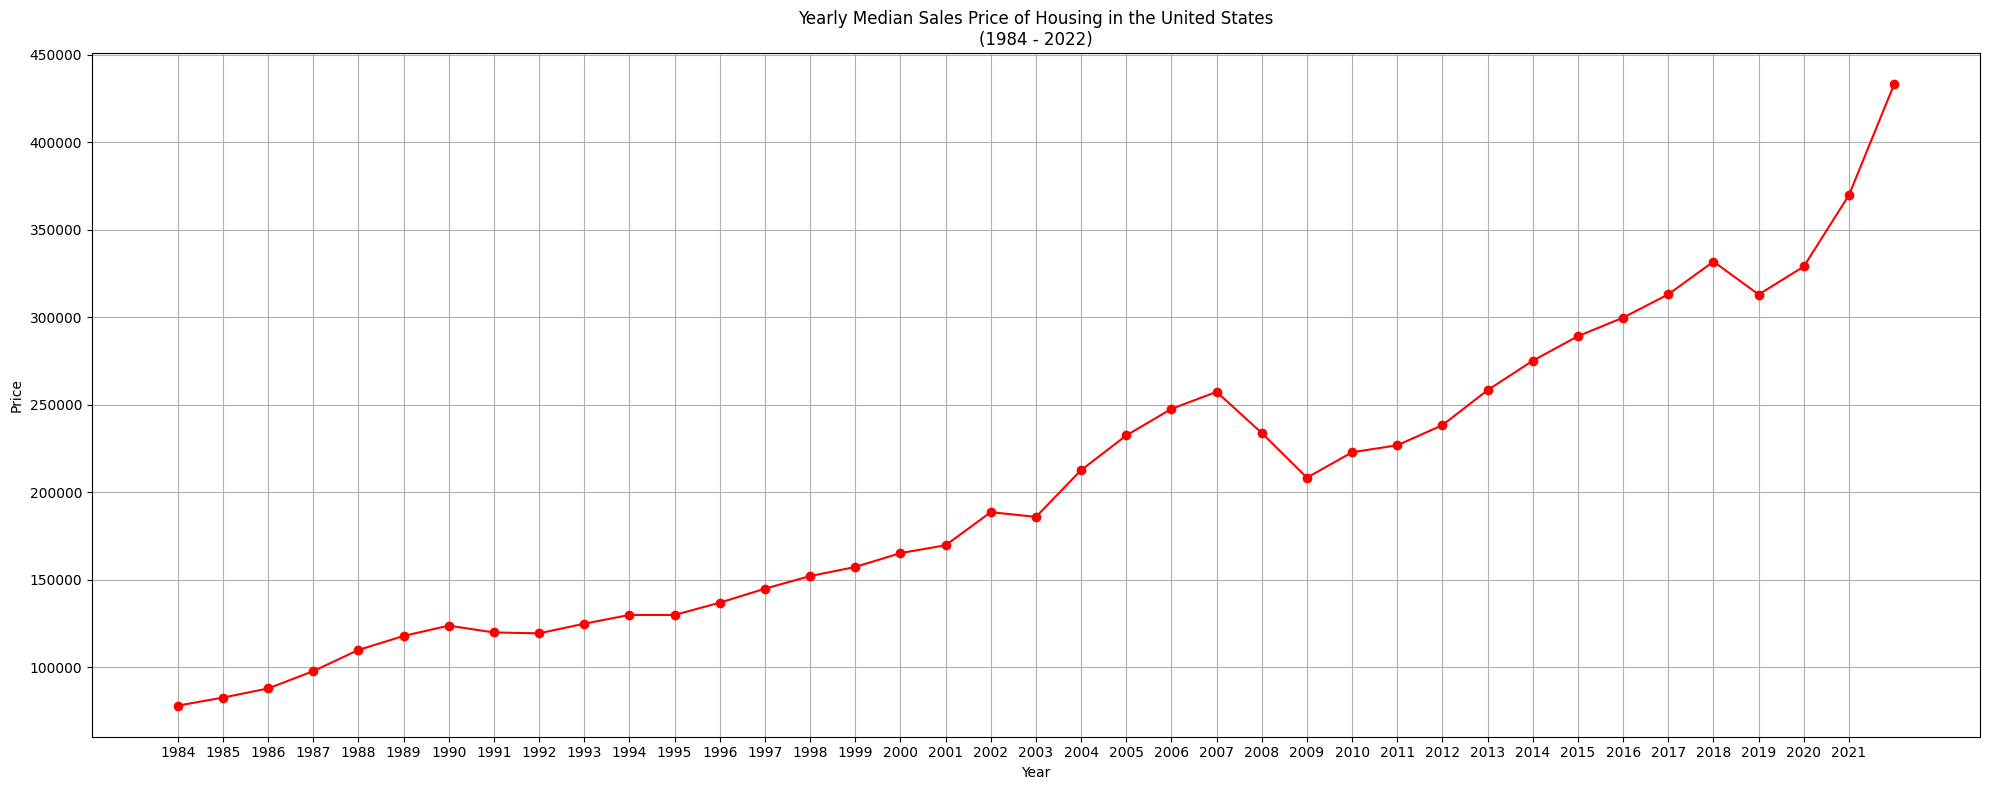

In [142]:
# plot of median sales price
plt.figure(figsize=(20, 8))
plt.plot(pd.to_datetime(combinedData["DATE"]).dt.year, combinedData["Median Sales Price of Housing"], marker="o", linestyle="-", color="red")
plt.title("Yearly Median Sales Price of Housing in the United States\n(1984 - 2022)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.xticks(np.arange(1984, 2022, 1))
plt.show()

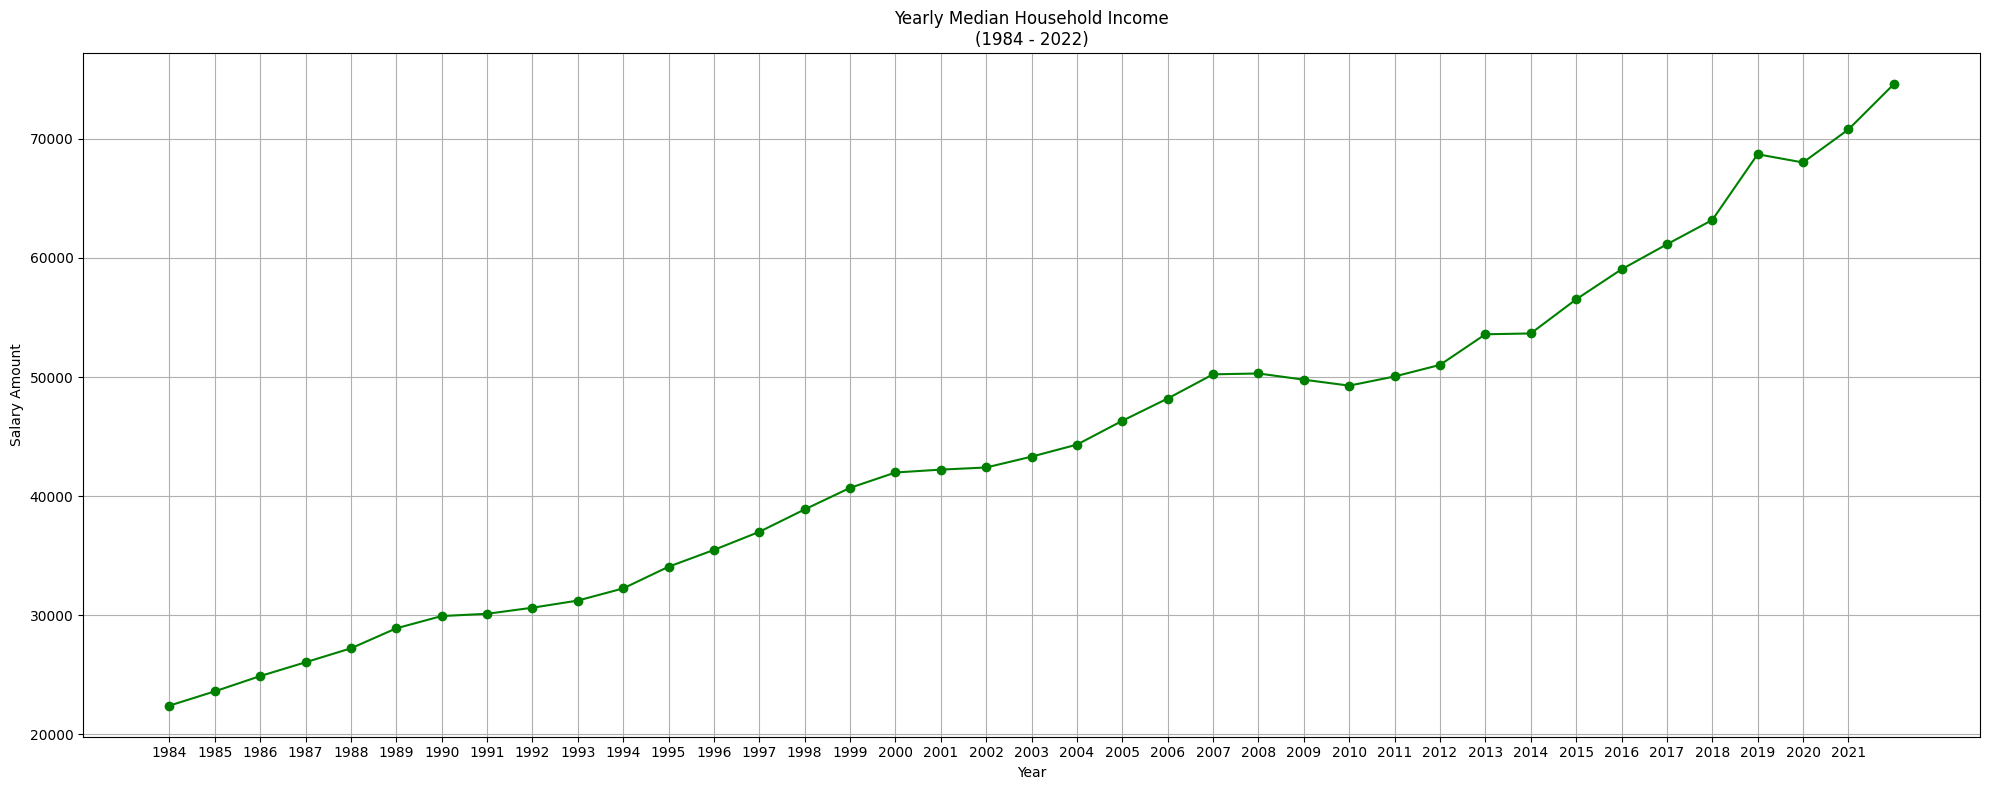

In [148]:
# plot of median household income
plt.figure(figsize=(20, 8))
plt.plot(pd.to_datetime(combinedData["DATE"]).dt.year, combinedData["Median Household Income"], marker="o", linestyle="-", color="green")
plt.title("Yearly Median Household Income\n(1984 - 2022)")
plt.xlabel("Year")
plt.ylabel("Salary Amount")
plt.grid(True)
plt.tight_layout()
plt.xticks(np.arange(1984, 2022, 1))
plt.show()

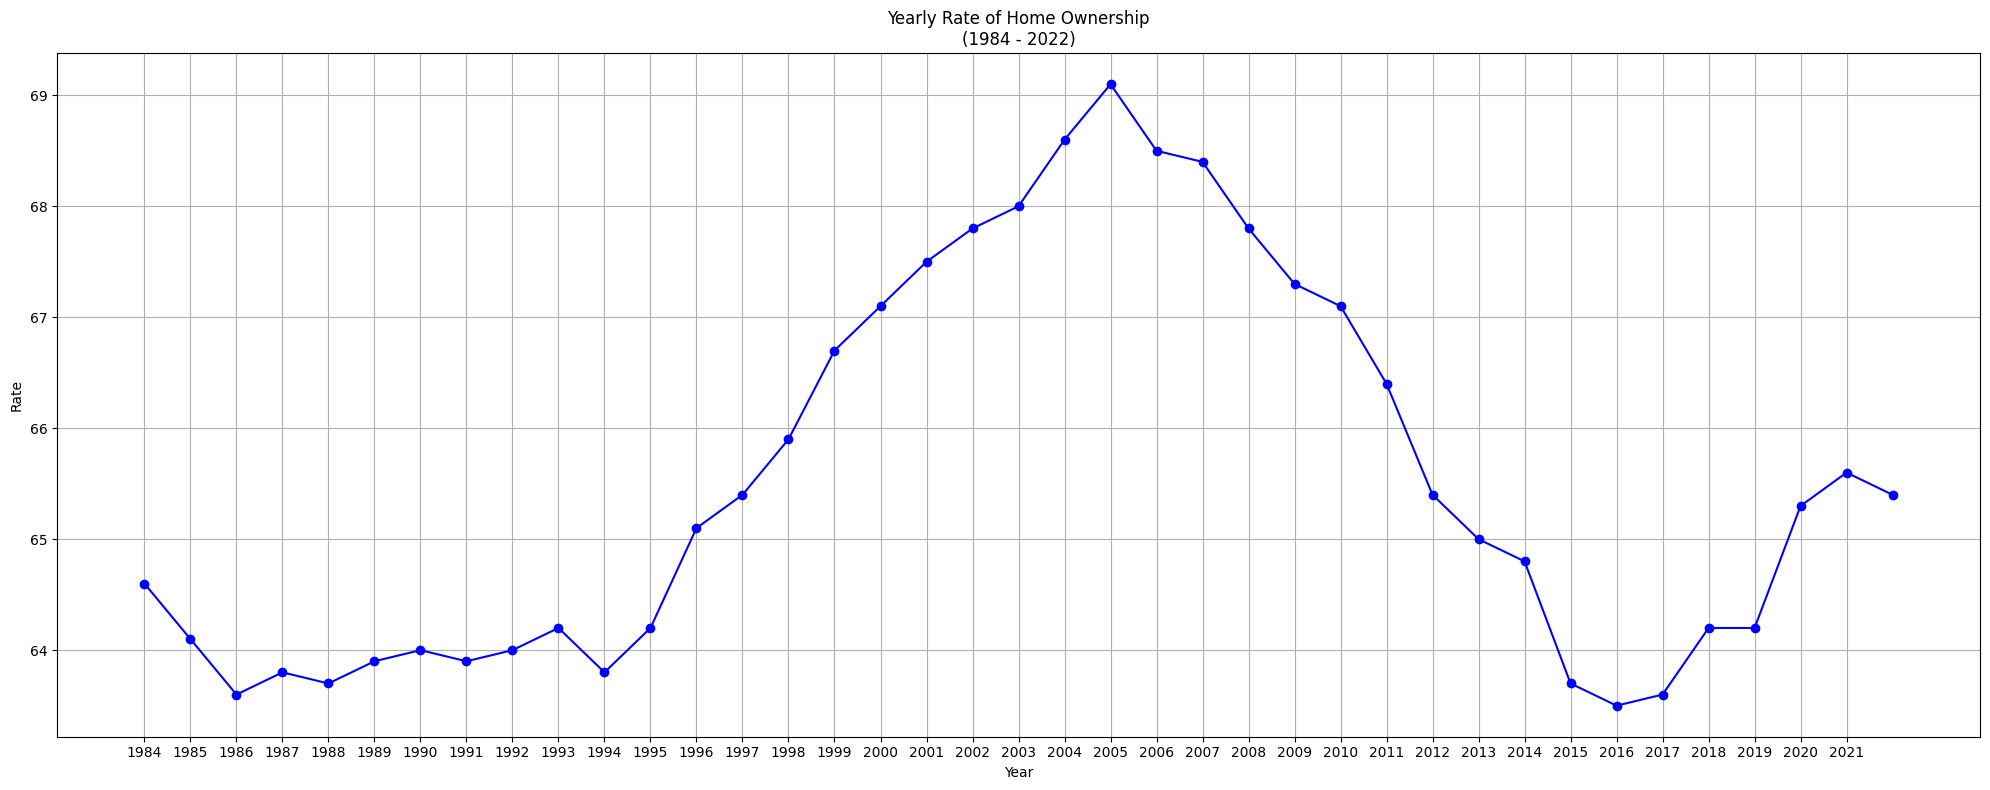

In [156]:
# plot of rate of homeownership
plt.figure(figsize=(20, 8))
plt.plot(pd.to_datetime(combinedData["DATE"]).dt.year, combinedData["Rate of Home Ownership"], marker="o", linestyle="-", color="blue")
plt.title("Yearly Rate of Home Ownership\n(1984 - 2022)")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.grid(True)
plt.tight_layout()
plt.xticks(np.arange(1984, 2022, 1))
plt.show()

In [ ]:
#INSERT MORE CODE HERE